In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df=pd.read_csv(r'C:\Users\Aishwik\Documents\F_R\Company Stock and Investment.csv')

In [4]:
df.head()

,Date,Oil Investments,Gold Investments,Comp Stock,Other sharesInvestments
0,31-12-2009,0.025417,0.000150,0.017354,0.006848
1,04-01-2010,0.026830,0.001097,0.015565,-0.004609
2,05-01-2010,0.002699,0.001560,0.001729,0.005900
3,06-01-2010,0.021688,0.006009,-0.015906,-0.018116
4,07-01-2010,-0.006256,0.000221,-0.001849,-0.017013


In [5]:
df.shape

(1984, 5)

In [6]:
df.isnull().sum()

Date                       0
Oil Investments            0
Gold Investments           0
Comp Stock                 0
Other sharesInvestments    0
dtype: int64

In [7]:
df['Date'].duplicated().sum()

0

In [8]:
df['Date']=pd.to_datetime(df['Date'])

In [9]:
df1=df.iloc[:,0:2]
df2=df[['Date', 'Gold Investments']]
df3=df[['Date', 'Comp Stock']]

In [10]:
df1.head(2)

,Date,Oil Investments
0,2009-12-31,0.025417
1,2010-04-01,0.026830


In [11]:
df2.head(2)

,Date,Gold Investments
0,2009-12-31,0.000150
1,2010-04-01,0.001097


In [12]:
df1.set_index('Date',inplace=True)
df2.set_index('Date',inplace=True)
df3.set_index('Date',inplace=True)

In [13]:
df1.describe()

,Oil Investments
count,1984.000000
mean,-0.000435
std,0.030869
min,-1.000000
25%,-0.011021
50%,0.000277
75%,0.010734
max,0.119511


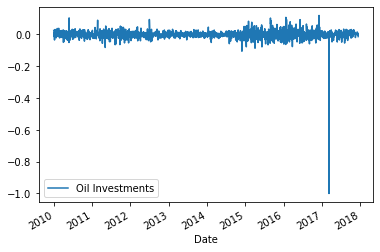

In [14]:
df1.plot()

In [15]:
### Testing For Stationarity

from statsmodels.tsa.stattools import adfuller

In [16]:
test_result=adfuller(df1['Oil Investments'])

In [17]:
 # just showing the ouput of test_result
print(" The Values given as output by adfuller is : \n 'ADF Test Statistic','p-value','#Lags Used','Number of Observations Used'\n\n",test_result)

 The Values given as output by adfuller is : 
 'ADF Test Statistic','p-value','#Lags Used','Number of Observations Used'

 (-45.94216292983992, 0.0, 0, 1983, {'1%': -3.4336519592295947, '5%': -2.862998620943585, '10%': -2.567546508593341}, -8042.187722182893)


In [18]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(sales):
    result=adfuller(sales) # same as above ,variable name changed
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data  is stationary")
    else:
        print("weak evidence against null hypothesis, time series is non-stationary ")
    

In [19]:
adfuller_test(df1['Oil Investments'])

ADF Test Statistic : -45.94216292983992
p-value : 0.0
#Lags Used : 0
Number of Observations Used : 1983
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data  is stationary


In [20]:
df1['Oil Investments First Difference'] = df1['Oil Investments'] - df1['Oil Investments'].shift(1)

In [21]:
df1['Oil Investments'].shift(1).head() # its shift one down

Date
2009-12-31         NaN
2010-04-01    0.025417
2010-05-01    0.026830
2010-06-01    0.002699
2010-07-01    0.021688
Name: Oil Investments, dtype: float64

In [22]:
df1['Seasonal First Difference']=df1['Oil Investments']-df1['Oil Investments'].shift(12) 
#as seasonal its a 12 month data

In [23]:
df1.head()

,Oil Investments,Oil Investments First Difference,Seasonal First Difference
Date,,,
2009-12-31,0.025417,NaN,NaN
2010-04-01,0.026830,0.001412,NaN
2010-05-01,0.002699,-0.024131,NaN
2010-06-01,0.021688,0.018990,NaN
2010-07-01,-0.006256,-0.027944,NaN


In [24]:
## Again test dickey fuller test
adfuller_test(df1['Seasonal First Difference'].dropna())

ADF Test Statistic : -15.397987538927724
p-value : 3.243529307166033e-28
#Lags Used : 23
Number of Observations Used : 1948
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data  is stationary


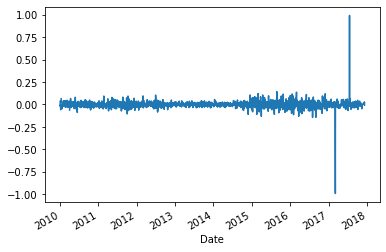

In [25]:
df1['Seasonal First Difference'].plot()

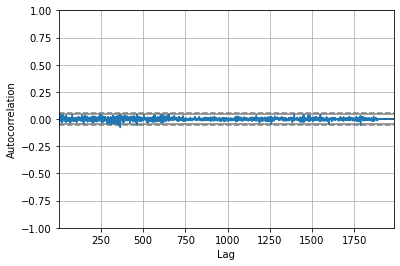

In [26]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Oil Investments'])
plt.show()

In [27]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm

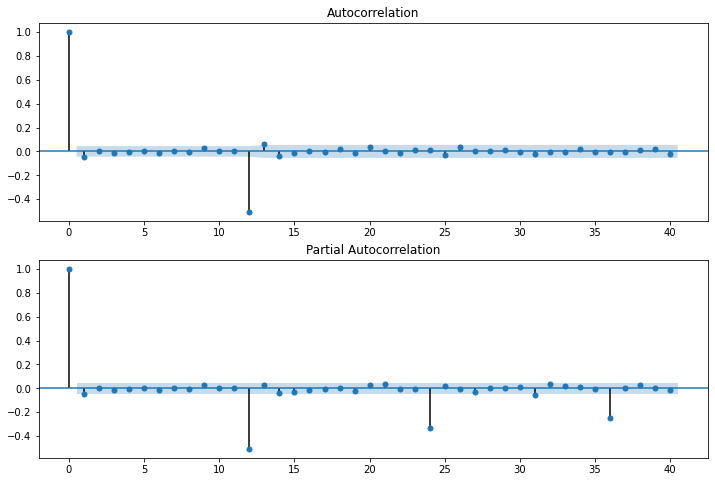

In [28]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
# First 12 values are null so we will start from 13
fig = sm.graphics.tsa.plot_acf(df1['Seasonal First Difference'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df1['Seasonal First Difference'].iloc[13:],lags=40,ax=ax2)

In [29]:
# For non-seasonal data
#p=1, d=1, q=0 or 1
# Usually in seasonal data we avoid arima ,just showing u how to impliment
from statsmodels.tsa.arima_model import ARIMA

In [30]:
model=ARIMA(df1['Oil Investments'],order=(1,1,1)) # this order is p d q(0 or 1) 
model_fit=model.fit()

C:\Users\Aishwik\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\Aishwik\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:220: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it is not'
C:\Users\Aishwik\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\Aishwik\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:220: ValueWarning: A date index has been provided, but it is not monotonic and so w

In [31]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:      D.Oil Investments   No. Observations:                 1983
Model:                 ARIMA(1, 1, 1)   Log Likelihood                4081.135
Method:                       css-mle   S.D. of innovations              0.031
Date:                Sun, 01 Nov 2020   AIC                          -8154.270
Time:                        12:37:12   BIC                          -8131.901
Sample:                             1   HQIC                         -8146.053
                                                                              
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                   -1.541e-06   1.17e-06     -1.315      0.188   -3.84e-06    7.56e-07
ar.L1.D.Oil Investments    -0.0319      0.022     -1.419      0.156      -0.076       0.012
ma.L1.D.Oil Investments    -1.0000      0.001   -736.728      0.000      -1.003      -0.997
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1          -31.3874           +0.0000j           31.3874            0.5000
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

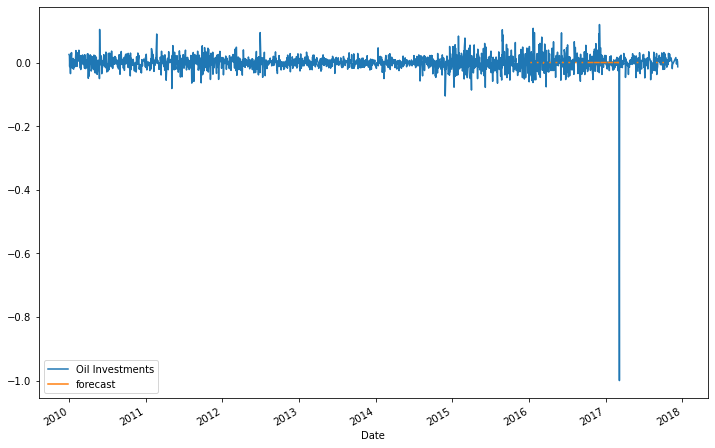

In [32]:
df1['forecast']=model_fit.predict(start=1700,end=1800,dynamic=True)
df1[['Oil Investments','forecast']].plot(figsize=(12,8))

In [33]:
import statsmodels.api as sm

In [34]:
model=sm.tsa.statespace.SARIMAX(df1['Oil Investments'],order=(1, 1, 1),seasonal_order=(1,1,1,12)) #(p,d,q,Shift)
results=model.fit()

C:\Users\Aishwik\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\Aishwik\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:220: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it is not'
C:\Users\Aishwik\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\Aishwik\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:220: ValueWarning: A date index has been provided, but it is not monotonic and so w

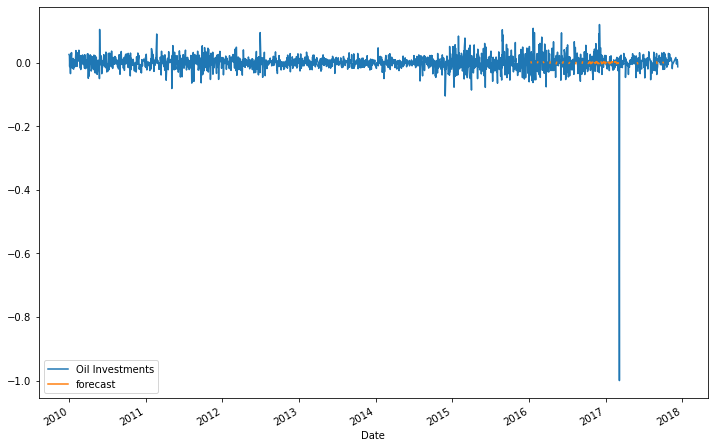

In [35]:
df1['forecast']=results.predict(start=1700,end=1800,dynamic=True)
df1[['Oil Investments','forecast']].plot(figsize=(12,8))

In [38]:
df2.describe()

,Gold Investments
count,1984.000000
mean,-0.020152
std,0.140965
min,-1.000000
25%,-0.005881
50%,0.000000
75%,0.005454
max,0.049577


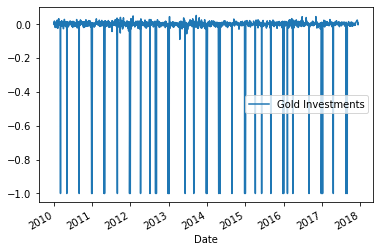

In [39]:
df2.plot()

In [40]:
### Testing For Stationarity

from statsmodels.tsa.stattools import adfuller

In [41]:
test_result=adfuller(df2['Gold Investments'])

In [42]:
# just showing the ouput of test_result
print(" The Values given as output by adfuller is : \n 'ADF Test Statistic','p-value','#Lags Used','Number of Observations Used'\n\n",test_result)

 The Values given as output by adfuller is : 
 'ADF Test Statistic','p-value','#Lags Used','Number of Observations Used'

 (-15.906853851669043, 8.208405770369246e-29, 7, 1976, {'1%': -3.4336636717018405, '5%': -2.8630037919874423, '10%': -2.567549261922421}, -2147.421096479902)


In [43]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(sales):
    result=adfuller(sales) # same as above ,variable name changed
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data  is stationary")
    else:
        print("weak evidence against null hypothesis, time series is non-stationary ")
    

In [45]:
adfuller_test(df2['Gold Investments'])

ADF Test Statistic : -15.906853851669043
p-value : 8.208405770369246e-29
#Lags Used : 7
Number of Observations Used : 1976
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data  is stationary


In [47]:
df2['Gold Investments First Difference'] = df2['Gold Investments'] - df2['Gold Investments'].shift(1)

<ipython-input-47-f07d4ba2c9f5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Gold Investments First Difference'] = df2['Gold Investments'] - df2['Gold Investments'].shift(1)


In [48]:
df2['Gold Investments'].shift(1).head() # its shift one down

Date
2009-12-31         NaN
2010-04-01    0.000150
2010-05-01    0.001097
2010-06-01    0.001560
2010-07-01    0.006009
Name: Gold Investments, dtype: float64

In [49]:
df2['Seasonal First Difference']=df2['Gold Investments']-df2['Gold Investments'].shift(12) 
#as seasonal its a 12 month data

<ipython-input-49-f82e5b652565>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Seasonal First Difference']=df2['Gold Investments']-df2['Gold Investments'].shift(12)


In [50]:
df2.head()

,Gold Investments,Gold Investments First Difference,Seasonal First Difference
Date,,,
2009-12-31,0.000150,NaN,NaN
2010-04-01,0.001097,0.000947,NaN
2010-05-01,0.001560,0.000464,NaN
2010-06-01,0.006009,0.004449,NaN
2010-07-01,0.000221,-0.005788,NaN


In [51]:
## Again test dickey fuller test
adfuller_test(df2['Seasonal First Difference'].dropna())

ADF Test Statistic : -14.867729901000153
p-value : 1.681492015166489e-27
#Lags Used : 23
Number of Observations Used : 1948
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data  is stationary


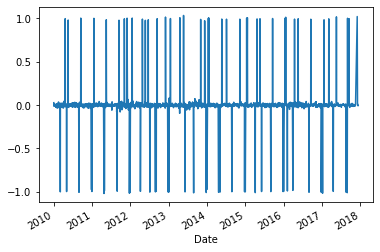

In [52]:
df2['Seasonal First Difference'].plot()

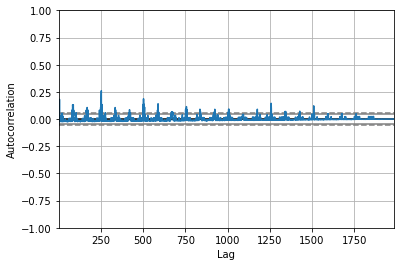

In [53]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df2['Gold Investments'])
plt.show()

In [54]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm

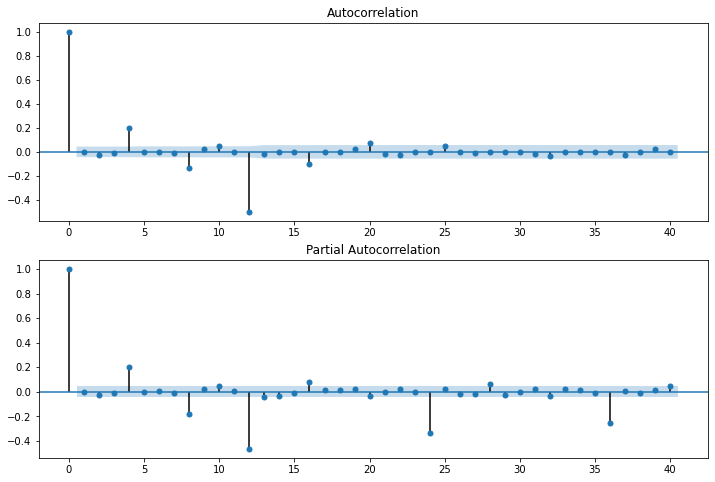

In [55]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
# First 12 values are null so we will start from 13
fig = sm.graphics.tsa.plot_acf(df2['Seasonal First Difference'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df2['Seasonal First Difference'].iloc[13:],lags=40,ax=ax2)

In [56]:
# For non-seasonal data
#p=1, d=1, q=0 or 1
# Usually in seasonal data we avoid arima ,just showing u how to impliment
from statsmodels.tsa.arima_model import ARIMA

In [58]:
model=ARIMA(df2['Gold Investments'],order=(1,1,1)) # this order is p d q(0 or 1) 
model_fit=model.fit()

C:\Users\Aishwik\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\Aishwik\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:220: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it is not'
C:\Users\Aishwik\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\Aishwik\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:220: ValueWarning: A date index has been provided, but it is not monotonic and so w

In [59]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:     D.Gold Investments   No. Observations:                 1983
Model:                 ARIMA(1, 1, 1)   Log Likelihood                1068.157
Method:                       css-mle   S.D. of innovations              0.141
Date:                Sun, 01 Nov 2020   AIC                          -2128.314
Time:                        12:49:02   BIC                          -2105.944
Sample:                             1   HQIC                         -2120.097
                                                                              
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                    -1.236e-06   5.41e-06     -0.229      0.819   -1.18e-05    9.36e-06
ar.L1.D.Gold Investments    -0.0226      0.022     -1.009      0.313      -0.067       0.021
ma.L1.D.Gold Investments    -0.9999      0.001   -775.155      0.000      -1.002      -0.997
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1          -44.1556           +0.0000j           44.1556            0.5000
MA.1            1.0001           +0.0000j            1.0001            0.0000
-----------------------------------------------------------------------------
"""

<ipython-input-60-ed304f3e339f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['forecast']=model_fit.predict(start=1700,end=1800,dynamic=True)


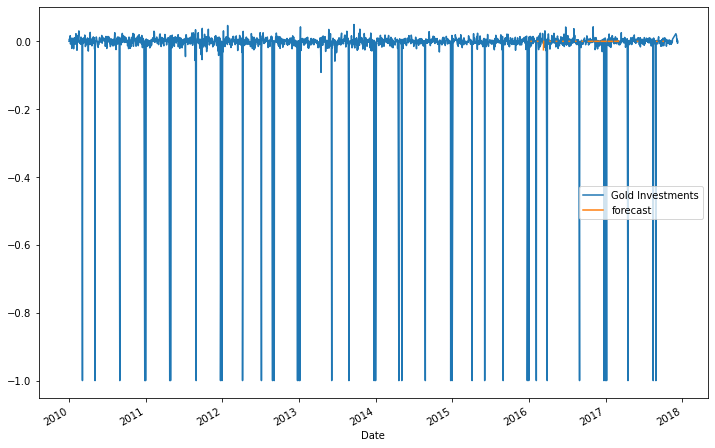

In [60]:
df2['forecast']=model_fit.predict(start=1700,end=1800,dynamic=True)
df2[['Gold Investments','forecast']].plot(figsize=(12,8))

In [61]:
import statsmodels.api as sm

In [62]:
model=sm.tsa.statespace.SARIMAX(df2['Gold Investments'],order=(1, 1, 1),seasonal_order=(1,1,1,12)) #(p,d,q,Shift)
results=model.fit()

C:\Users\Aishwik\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\Aishwik\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:220: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it is not'
C:\Users\Aishwik\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\Aishwik\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:220: ValueWarning: A date index has been provided, but it is not monotonic and so w

<ipython-input-63-e2ae066d8981>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['forecast']=results.predict(start=1700,end=1800,dynamic=True)


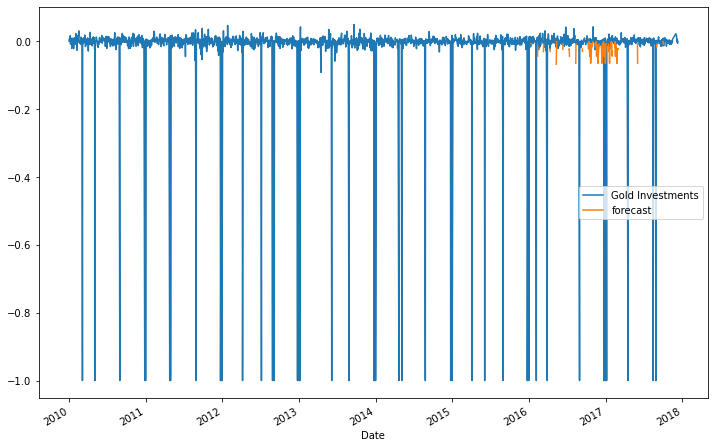

In [63]:
df2['forecast']=results.predict(start=1700,end=1800,dynamic=True)
df2[['Gold Investments','forecast']].plot(figsize=(12,8))